In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv("sonar_csv.csv")

In [3]:
data.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [4]:
data.dtypes

attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
                 ...   
attribute_57    float64
attribute_58    float64
attribute_59    float64
attribute_60    float64
Class            object
Length: 61, dtype: object

In [5]:
data.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
#Condition 1 : Checking Correlation
corr=data.corr()
corr.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
attribute_1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
attribute_2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
attribute_3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
attribute_4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
attribute_5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710


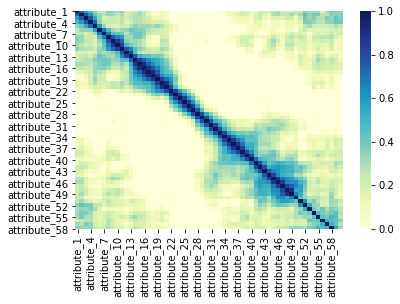

In [7]:
fig=sns.heatmap(corr,vmin=0, vmax=1, center=0.5,cmap="YlGnBu")
fig = plt.gcf()
figsize = fig.get_size_inches()


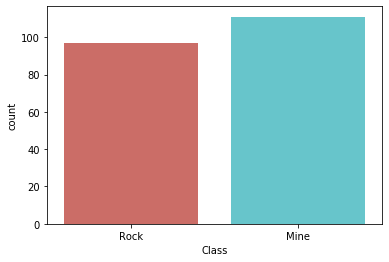

In [8]:
#Condition 2 : Checking if dataset is balanced
sns.countplot(x = 'Class', data = data, palette = 'hls')
plt.show()

In [9]:
data['Class'].value_counts()

Mine    111
Rock     97
Name: Class, dtype: int64

In [10]:
X = data.iloc[:,0:60]
X.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [11]:
Y = data.iloc[:,-1]
rep_val = {'Rock':0,'Mine':1}
Y = [rep_val[i] for i in Y]

In [12]:
Y = pd.DataFrame(Y)
Y.columns= ['class']
#y2n =pd.get_dummies(y2n)

In [13]:
Y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
clf = LogisticRegression( random_state=0, solver = 'lbfgs')

In [16]:
clf.fit(X_train, Y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Overfitting check

In [17]:
print(clf.score(X_test, Y_test))

0.8095238095238095


In [18]:
print(clf.score(X_train, Y_train))

0.8433734939759037


Model is overfitting

In [19]:
Y_predict=clf.predict(X_test)

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [21]:
y_pred_proba = clf.predict_proba(X_test)[::,1]


In [22]:
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)


In [23]:
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

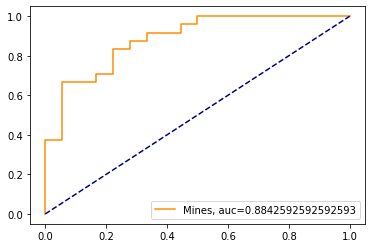

In [24]:

plt.plot(fpr,tpr,color="darkorange",label="Mines, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.legend()
plt.show()

## Feature Selection

In [ ]:
# To check if model stops overfitting if no. of features are reduced

###  Checking randomly for 30 features

In [25]:
X1 = X
Y1 = Y

In [26]:
model = LogisticRegression(solver='lbfgs')

In [27]:
rfe = RFE(model, 30)

In [28]:
fit = rfe.fit(X1, Y1.values.ravel())

In [29]:
print("Num Features: %s" % (fit.n_features_))

Num Features: 30


In [30]:
print("Selected Features: %s" % (fit.support_))

Selected Features: [False False False  True  True False False False  True  True  True  True
  True False False  True  True False False  True  True  True  True False
 False False False  True False  True  True False False False  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True False False False False False False False False False False False]


In [31]:
print("Feature Ranking: %s" % (fit.ranking_))

Feature Ranking: [10  2  7  1  1 18 17 29  1  1  1  1  1 31  4  1  1 11  9  1  1  1  1  8
 12  5 22  1  6  1  1 13 24  3  1  1  1  1  1  1 15  1  1  1  1  1  1  1
  1 27 14 16 23 19 28 26 30 21 20 25]


In [32]:
k = fit.ranking_

In [33]:
k

array([10,  2,  7,  1,  1, 18, 17, 29,  1,  1,  1,  1,  1, 31,  4,  1,  1,
       11,  9,  1,  1,  1,  1,  8, 12,  5, 22,  1,  6,  1,  1, 13, 24,  3,
        1,  1,  1,  1,  1,  1, 15,  1,  1,  1,  1,  1,  1,  1,  1, 27, 14,
       16, 23, 19, 28, 26, 30, 21, 20, 25])

In [34]:
l = len(k)
l

60

In [35]:
j=0
array = []
for i in range(l) :
    if(k[i]==1):
        array.append(i)
print(array)


[3, 4, 8, 9, 10, 11, 12, 15, 16, 19, 20, 21, 22, 27, 29, 30, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48]


In [36]:
x_new = X1.iloc[:,array]
x_new.head()

,attribute_4,attribute_5,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_16,attribute_17,attribute_20,...,attribute_39,attribute_40,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49
0,0.0207,0.0954,0.3109,0.2111,0.1609,0.1582,0.2238,0.2273,0.3100,0.4797,...,0.4943,0.2744,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383
1,0.0689,0.1183,0.3337,0.2872,0.4918,0.6552,0.6919,0.9444,1.0000,0.7818,...,0.1840,0.1970,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409
2,0.1083,0.0974,0.5598,0.6194,0.6333,0.7060,0.5544,0.6931,0.6759,0.8619,...,0.5375,0.4719,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130
3,0.0205,0.0205,0.0598,0.1264,0.0881,0.1992,0.0184,0.2131,0.0693,0.3973,...,0.9857,0.9167,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681
4,0.0394,0.0590,0.3564,0.4459,0.4152,0.3952,0.4256,0.5326,0.7306,0.4636,...,0.2828,0.2430,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230


In [37]:
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(x_new, Y1, test_size=0.2)

In [38]:
model.fit(Xn_train,Yn_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
Yn_predict=model.predict(Xn_test)

In [40]:
score = model.score(Xn_test, Yn_test)
score

0.7857142857142857

In [41]:
s2 = model.score(Xn_train,Yn_train)

In [42]:
s2

0.8373493975903614

## Loop to determine no of features

In [43]:
model = LogisticRegression(solver='lbfgs')

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
score1 = np.tile(0., 61)
score2 = np.tile(0., 61)
print("Features | Training accuracy | Testing Accuracy ")
for p in range(1,61):
    rfe = RFE(model, p)
    fit = rfe.fit(X1, Y1.values.ravel())
    k = fit.ranking_
    array = []
    i=0
    for i in range (len(k)):
        if(k[i]==1):
            array.append(i)
    x_new = X1.iloc[:,array]
    Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(x_new, Y1, test_size=0.2)
    model.fit(Xn_train,Yn_train.values.ravel())
    print(p,end="        | ")
    s1 = round((model.score(Xn_train,Yn_train)),5)
    s2 = round((model.score(Xn_test, Yn_test)),5)
    score1[p]=s1
    score2[p]=s2
    print(s1,end="          |  ")
    print(s2)


Features | Training accuracy | Testing Accuracy 
1        | 0.72892          |  0.78571
2        | 0.74096          |  0.52381
3        | 0.78313          |  0.7381
4        | 0.79518          |  0.78571
5        | 0.81325          |  0.7381
6        | 0.80723          |  0.78571
7        | 0.8012          |  0.78571
8        | 0.76506          |  0.78571
9        | 0.76506          |  0.83333
10        | 0.8253          |  0.61905
11        | 0.81325          |  0.7381
12        | 0.81928          |  0.7619
13        | 0.80723          |  0.7619
14        | 0.81325          |  0.78571
15        | 0.78916          |  0.7381
16        | 0.81928          |  0.69048
17        | 0.81928          |  0.88095
18        | 0.83133          |  0.7381
19        | 0.83735          |  0.71429
20        | 0.8494          |  0.69048
21        | 0.81928          |  0.7381
22        | 0.80723          |  0.78571
23        | 0.80723          |  0.7619
24        | 0.81928          |  0.80952
25        | 

In [46]:
import array
xaxis = array.array('i',(i for i in range(1,61)))
xaxis

array('i', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [47]:
score1=score1[score1!=0.]
score2=score2[score2!=0.]

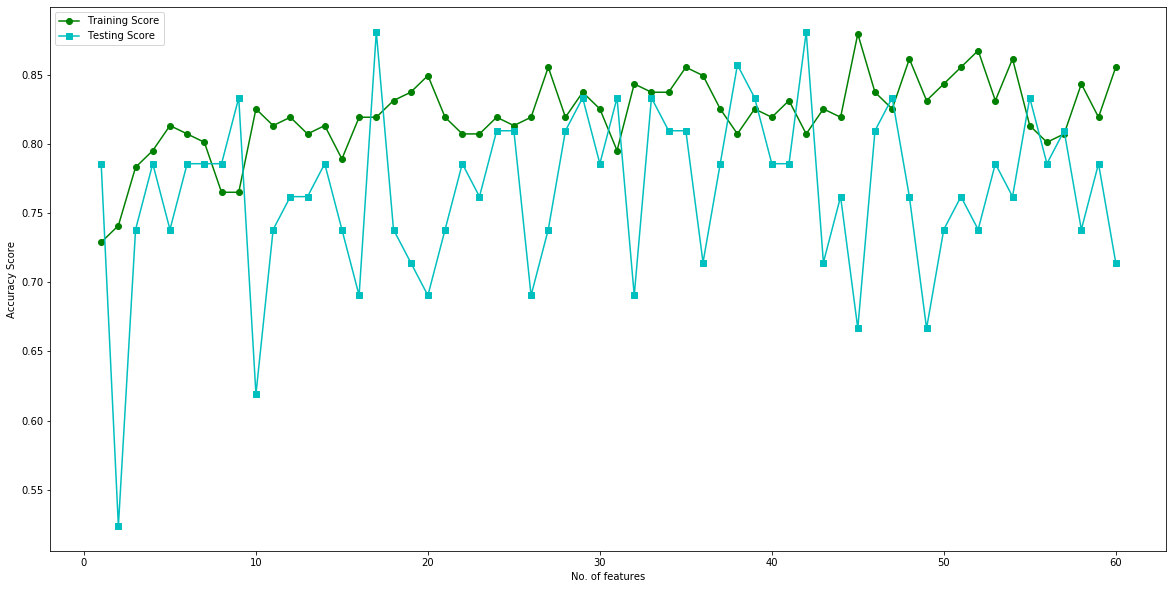

In [48]:
fig, aa = plt.subplots(figsize=(20,10))
plt.plot(xaxis, score1,'go-', Label='Training Score')
plt.plot(xaxis, score2,'cs-', Label = 'Testing Score')
plt.xlabel('No. of features')
plt.ylabel('Accuracy Score')
legend = aa.legend(loc='upper left')

#### Max Accuracy=88.09 with 48 features among the no.of features where the model doesn't overfit